## Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, you'll further investigate how to tune your own logistic regression implementation, as well as that of scikit-learn in order to produce better models.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, you were able to verify your manual logistic regression model output using scikit-learn. However, that model did not include an intercept or any regularization. In this investigative lab, you will analyze the impact of these two tuning parameters.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [1]:
#Your code here
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implement a standard train-test split.  
**For consistency of results, use random_state=17.**

In [4]:
#Your code here
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]]
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
print(y_train.value_counts(normalize=True),'\n', y_test.value_counts(normalize=True))

1.0    0.572687
0.0    0.427313
Name: target, dtype: float64 
 0.0    0.539474
1.0    0.460526
Name: target, dtype: float64


## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

In [5]:
# Your code here
import numpy as np

def sigmoid(x):
    x = np.array(x)
    return 1 / (1 + np.e**(-x))

def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    # initial weights behavior
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1], 1)).flatten()
    weights = initial_weights
    #Create a for loop of iterations
    for iteration in range(max_iterations):
        #Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X, weights))
        #Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        #Calculate the gradient 
        #As we saw in the previous lab, calculating the gradient is often the most difficult task.
        #Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        #For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(), error_vector)
        #Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
    #Return finalized Weights
    return weights

weights = grad_desc(X_train, y_train, 50000, 0.001)

## Now use your algorithm to make [probability] predictions on the test set

In [6]:
#Your code here
y_hat_test = sigmoid(np.dot(X_test, weights))

print([round(y_hat_i, 2) for y_hat_i in y_hat_test])

[0.96, 0.02, 0.09, 0.12, 0.0, 1.0, 0.25, 0.94, 0.0, 0.8, 0.04, 0.69, 0.53, 0.0, 0.99, 0.59, 0.69, 0.01, 0.99, 0.03, 0.98, 0.98, 0.03, 0.78, 0.76, 0.78, 0.0, 0.08, 0.02, 0.01, 0.74, 0.02, 0.99, 0.05, 0.35, 0.99, 0.85, 0.31, 0.78, 0.99, 0.97, 0.14, 0.0, 0.01, 0.96, 0.9, 0.98, 0.73, 0.02, 0.0, 0.98, 0.0, 0.0, 0.68, 0.85, 0.0, 0.66, 0.6, 0.01, 0.97, 0.07, 0.0, 0.98, 0.43, 0.91, 0.08, 0.81, 0.99, 0.01, 0.26, 0.68, 0.18, 0.98, 0.02, 0.96, 0.94]


## Create an ROC curve for your predictions

AUC: 0.8996515679442508


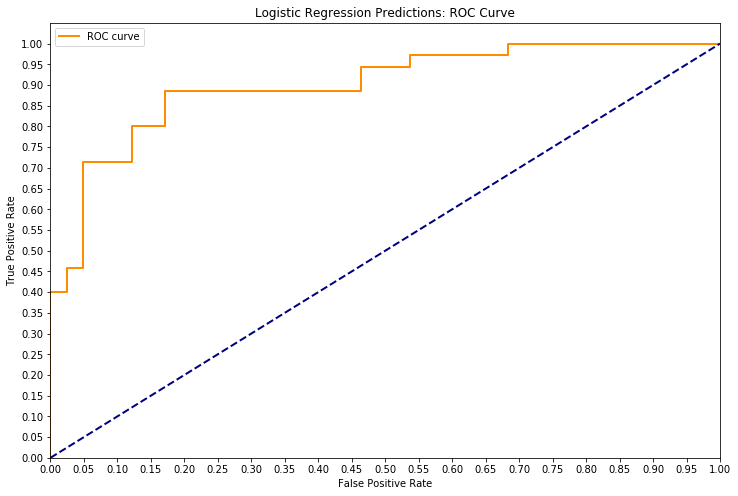

In [9]:
#Your code here
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)
print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(12, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i / 20.0 for i in range(21)])
plt.xticks([i / 20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Predictions: ROC Curve')
plt.legend()
plt.show()

## Update your ROC curve to not only include a graph of the test set, but one of the train set

Train AUC: 0.9291038858049168
Test AUC: 0.8996515679442508


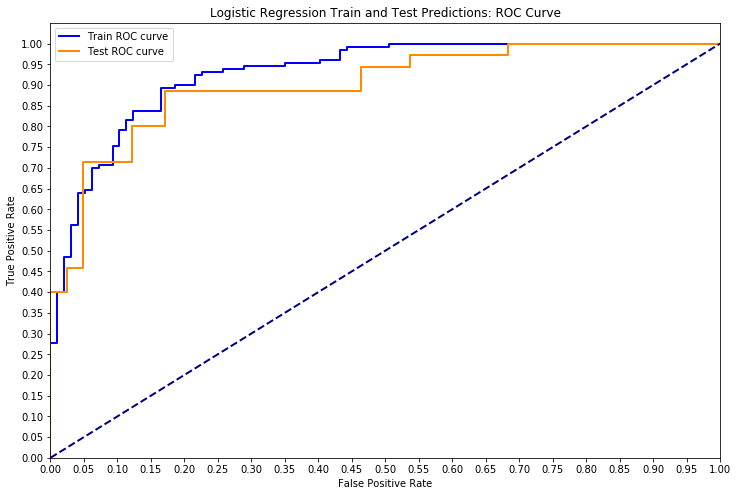

In [11]:
# Your code here
y_hat_train = sigmoid(np.dot(X_train, weights))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(12, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='blue', lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i / 20.0 for i in range(21)])
plt.xticks([i / 20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Train and Test Predictions: ROC Curve')
plt.legend()
plt.show()

## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterward, feel free to use the built-in scikit-learn methods to compute the confusion matrix as we discussed in previous sections.

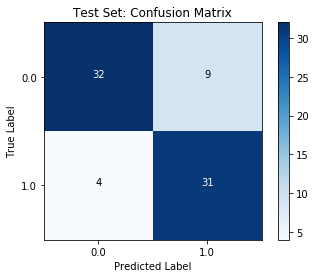

In [14]:
# Your code here
import itertools
from sklearn.metrics import confusion_matrix

def binary_prediction(probabilities, threshold=0.5):
    classes = []
    for p in probabilities:
        if p >= threshold:
            classes.append(1)
        else:
            classes.append(0)
            
    return classes

test_predictions = binary_prediction(y_hat_test)
cm_test = confusion_matrix(y_test, test_predictions)
# Plot
plt.imshow(cm_test,  cmap=plt.cm.Blues)
plt.title('Test Set: Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
#Add appropriate Axis Scales
class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Add Labels to Each Cell
thresh = cm_test.max() / 2. 
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cm_test.shape[0]), range(cm_test.shape[1])):
        plt.text(j, i, cm_test[i, j], horizontalalignment="center",
                 color="white" if cm_test[i, j] > thresh else "black")
#Add a Side Bar Legend Showing Colors
plt.colorbar()

## Initial Model - scikit-learn

Do the same using the built-in method from scikit-learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [15]:
# Your code here
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e16)
logreg.fit(X_train, y_train)

C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+16, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

## Create an ROC Curve for the scikit-learn model

AUC: 0.8996515679442508


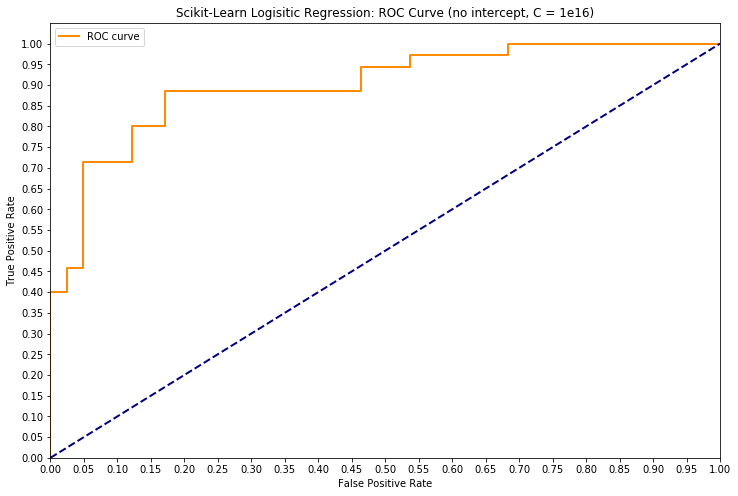

In [16]:
#Your code here
y_score = logreg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(12, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i / 20.0 for i in range(21)])
plt.xticks([i / 20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scikit-Learn Logisitic Regression: ROC Curve (no intercept, C = 1e16)')
plt.legend()
plt.show()

## As before add an ROC curve to the graph for the train set as well

Train AUC: 0.9291038858049168
Test AUC: 0.8996515679442508


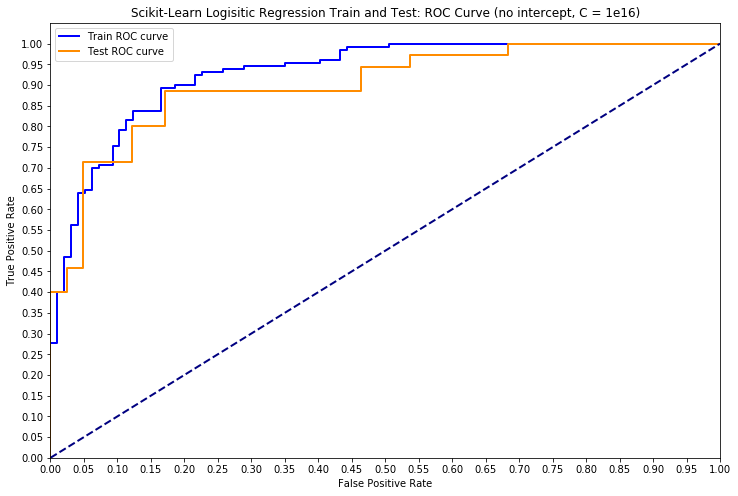

In [17]:
#Your code here
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))


plt.figure(figsize=(12, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='blue', lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i / 20.0 for i in range(21)])
plt.xticks([i / 20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scikit-Learn Logisitic Regression Train and Test: ROC Curve (no intercept, C = 1e16)')
plt.legend()
plt.show()

## Adding an Intercept

Now add an intercept to the scikit-learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

GRADIENT DESCENT MODEL
Train AUC: 0.9291038858049168
Test AUC: 0.8996515679442508

LOGISTIC REGRESSION MODEL WITHOUT INTERCEPT
Train AUC: 0.9291038858049168
Test AUC: 0.8996515679442508

LOGISTIC REGRESSION MODEL WITH INTERCEPT
Train AUC: 0.9325931800158604
Test AUC: 0.8989547038327527


C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


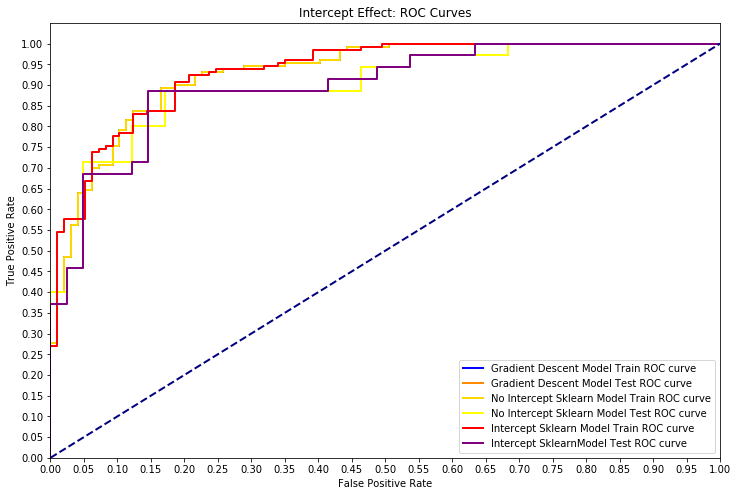

In [19]:
# Your code here
# Gradient Descent Model
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)

print('GRADIENT DESCENT MODEL')
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(12, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='blue', lw=lw, label='Gradient Descent Model Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='Gradient Descent Model Test ROC curve')


# Scikit-Learn Model without Intercept
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('\nLOGISTIC REGRESSION MODEL WITHOUT INTERCEPT')
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.plot(train_fpr, train_tpr, color='gold', lw=lw, label='No Intercept Sklearn Model Train ROC curve')
plt.plot(test_fpr, test_tpr, color='yellow', lw=lw, label='No Intercept Sklearn Model Test ROC curve')


# Model with Intercept (using Decision Function)
logreg_int = LogisticRegression(fit_intercept=True, C=1e16)
logreg_int.fit(X_train, y_train)

y_train_score = logreg_int.decision_function(X_train)
y_test_score = logreg_int.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('\nLOGISTIC REGRESSION MODEL WITH INTERCEPT')
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.plot(train_fpr, train_tpr, color='red', lw=lw, label='Intercept Sklearn Model Train ROC curve')
plt.plot(test_fpr, test_tpr, color='purple', lw=lw, label='Intercept SklearnModel Test ROC curve')

# Plotting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i / 20.0 for i in range(21)])
plt.xticks([i / 20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Intercept Effect: ROC Curves')
plt.legend()
plt.show()

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At a minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

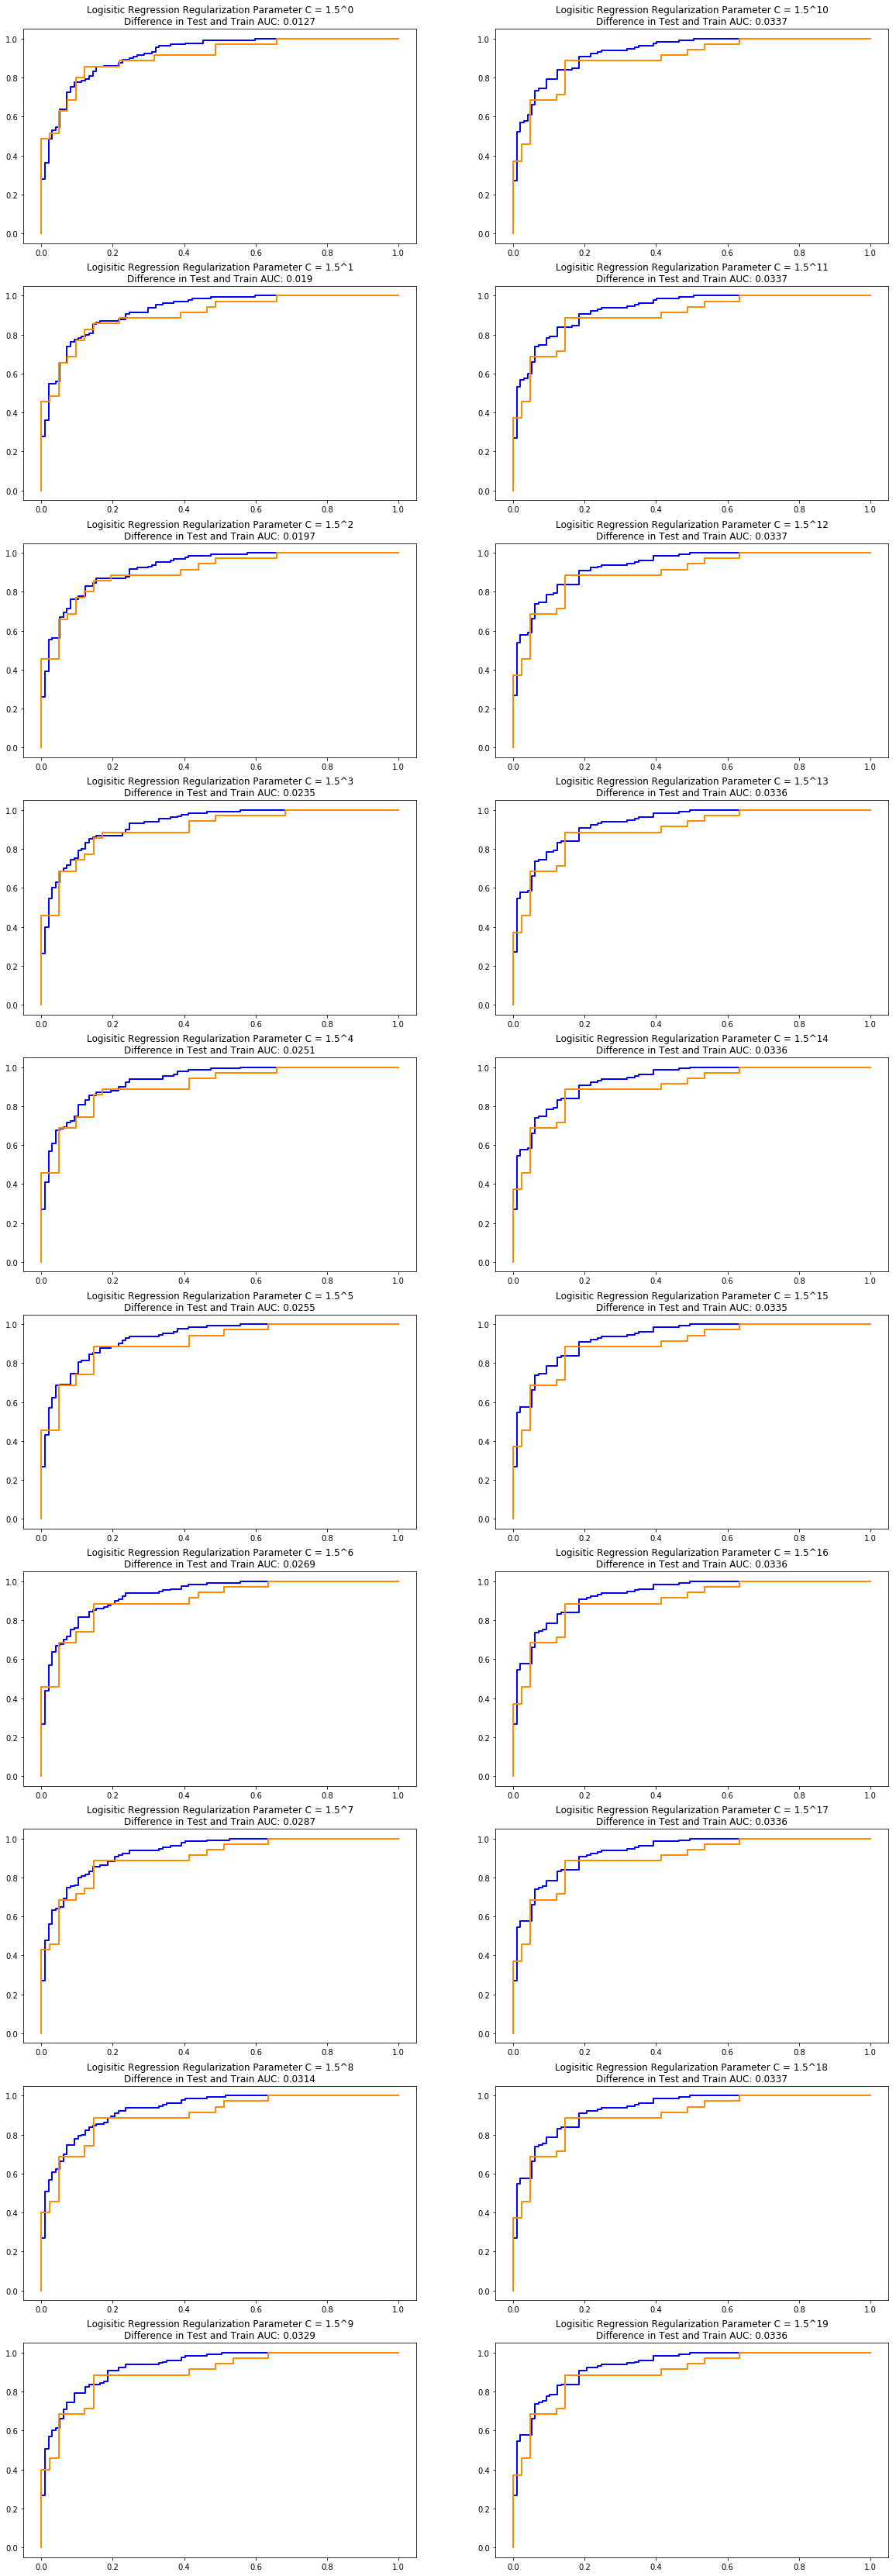

In [31]:
# Your code here
fig, axes = plt.subplots(10, 2, figsize=(20, 60))
for n in range(20):
    i = n % 10
    j = n // 10
    ax = axes[i, j]

    logreg = LogisticRegression(fit_intercept=True, C=1.5**n)
    logreg.fit(X_train, y_train)

    y_train_score = logreg.decision_function(X_train)
    y_test_score = logreg.decision_function(X_test)

    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    difference_auc = round(train_auc - test_auc, 4)
    
    ax.plot(train_fpr, train_tpr, color='blue', lw=lw, label='Train ROC curve')
    ax.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='Test ROC curve')
    
    ax.set_title('Logisitic Regression Regularization Parameter C = 1.5^{}\nDifference in Test and Train AUC: {}'.format(n, difference_auc))

## Comment on how the Regularization Parameter Impacts the ROC curves plotted above


The subplots above show that as the regularization parameter increases the difference in AUC between Training and Testing sets also increases.

## Summary

In this lab, you reviewed many of the accuracy measures for classification algorithms and observed the impact of additional tuning models using intercepts and regularization.